<a href="https://colab.research.google.com/github/aditya-vaish5/nnfl_term_project/blob/master/nnfl_termproject__lstm_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/train.en
!wget https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/train.vi
# !wget https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/tst2013.en
# !wget https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/tst2013.vi

--2020-05-23 18:32:57--  https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/train.en
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13603614 (13M) [text/plain]
Saving to: ‘train.en’

train.en            100%[===================>]  12.97M  3.55MB/s    in 3.7s    

2020-05-23 18:33:02 (3.55 MB/s) - ‘train.en’ saved [13603614/13603614]

--2020-05-23 18:33:04--  https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/train.vi
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18074646 (17M) [text/plain]
Saving to: ‘train.vi’

train.vi            100%[===================>]  17.24M  4.86MB/s    in 3.5s    

2020-05-23 18:33:08 (4.86 MB/s) - ‘train.vi’ saved [18074646/18074646]

--2020-0

In [0]:
import numpy as np
import csv
import torch
import torch.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import unicodedata
import re
import time

In [0]:
sentences_to_read = 140000

In [4]:
source_sent = []
target_sent = []

test_source_sent = []
test_target_sent = []


with open('train.en', encoding='utf-8') as f:
    for l_i, line in enumerate(f):
        # discarding first 20 translations as there was some
        # english to english translations found in the first few. which are wrong
        if l_i<50:
            continue
        source_sent.append(line)
        if len(source_sent)>=sentences_to_read:
            break
        
            
with open('train.vi', encoding='utf-8') as f:
    for l_i, line in enumerate(f):
        if l_i<50:
            continue
        
        target_sent.append(line)
        if len(target_sent)>=sentences_to_read:
            break
        
            
assert len(source_sent)==len(target_sent),'Source: %d, Target: %d'%(len(source_sent),len(target_sent))

print('Sample translations (%d)'%len(source_sent))
for i in range(0,sentences_to_read,10000):
    print('(',i,') EN: ', source_sent[i])
    print('(',i,') VI: ', target_sent[i])

Sample translations (133267)
( 0 ) EN:  In each one of those assessments that we write , we always tag on a summary , and the summary is written for a non-scientific audience .

( 0 ) VI:  Trong mỗi bản đánh giá chúng tôi viết , chúng tôi luôn đính kèm một bản tóm lược , được viết cho những độc giả không chuyên về khoa học .

( 10000 ) EN:  This is an area in the prefrontal cortex , a region where we can use cognition to try to overcome aversive emotional states .

( 10000 ) VI:  Đây là một khu vực trong vỏ não trước trán , vùng mà chúng sử dụng tri thức cho việc thử vượt qua trạng thái cảm xúc ác cảm .

( 20000 ) EN:  And there are flowers that are self-infertile . That means they can &apos;t -- the pollen in their bloom can &apos;t fertilize themselves .

( 20000 ) VI:  có những loài hoa không thể tự thụ phấn . Nghĩa là chúng không thể -- phấn hoa của nó không thể tụ thụ phấn được

( 30000 ) EN:  And a lot of this comes together in a philosophy of change that I find really is powerfu

In [0]:
# import re
# from collections import Counter

# with open('train.en') as f:
#     passage = f.read()

# words = re.findall(r'\S+', passage)

# cap_words = [word.upper() for word in words]

# word_counts = Counter(cap_words)

In [0]:
# # for i in range(0,len(word_counts),10000):
# print(word_counts)

In [0]:
# len(cap_words)

In [0]:
# from collections import OrderedDict
# sorted_train_eng = OrderedDict(sorted(word_counts.items(), key = lambda kv : kv[1], reverse=True))

In [0]:
# sorted_train_eng=list(sorted_train_eng)

In [0]:
# len(sorted_train_eng)

In [0]:
# sorted_train_engg=sorted_train_eng[0:100000]

In [0]:
# len(sorted_train_eng)

In [0]:
# print(sorted_train_engg)

In [0]:
# import re
# from collections import Counter

# with open('train.vi') as f:
#     passage = f.read()

# words = re.findall(r'\S+', passage)

# cap_words = [word.upper() for word in words]

# word_counts_vi = Counter(cap_words)

In [0]:
# from collections import OrderedDict
# sorted_train_vi = OrderedDict(sorted(word_counts_vi.items(), key = lambda kv : kv[1], reverse=True))

In [0]:
# sorted_train_vii=list(sorted_train_vi)


In [0]:
# len(sorted_train_vii)

In [0]:
# !wget https://nlp.stanford.edu/projects/nmt/data/iwslt15.en-vi/vocab.vi

In [0]:
# with open('vocab.vi') as f:
#     passage4 = f.read()

In [0]:
# passage4

In [0]:
# 

In [0]:
# import re

# words_vi = re.findall(r'\S+', passage4)
# words_vi[-3]

In [0]:
# len(words4)

In [0]:
# !wget https://nlp.stanford.edu/projects/nmt/data/wmt14.en-de/vocab.50K.en

In [0]:
# with open('vocab.50K.en') as f:
#     passage3 = f.read()
# words_en = re.findall(r'\S+', passage3)
# len(words3)

In [0]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [0]:
# # !apt install gzip
# # import gzip
# # with gzip.open('/content/glove.6B.txt.gz') as f:
# #   glove_vec = f.read()
# !unzip glove*.zip

In [0]:
# !ls


In [0]:
# f = open('glove.6B.50d.txt', encoding= 'utf-8')

In [0]:
# dic = {}
# for line in f:
#   v = line.split()
#   word = v[0]
#   vec = np.asarray(v[1:],dtype = 'float32')
#   dic[word] = vec
# f.close()

In [0]:
# print(len(dic))

In [0]:
# glove_dic =  OrderedDict(dic.items())

In [0]:
# # for i in range(0, len(glove_dic) ,10000):
#   print(glove_dic[i])

In [0]:
# import itertools

In [0]:
# x = itertools.islice(dic.items(), 0, len(dic),40000)

# for key, value in x:
#   print (key, value)

In [0]:
# len(words3)

In [0]:
# from scipy import spatial

In [0]:
# def return_embedding_for_eng_word(dic,word):
#   try:
#     x = dic[word]
#     return x
#   except KeyError:
#     return np.random.normal(0,2,50)

In [0]:

# eng_dict = {};
# for w in sorted:
#   eng_dict[w] = return_embedding_for_eng_word(dic,w)

In [0]:
# eng_vects = itertools.islice(eng_dict.items(), 0, len(eng_dict),10000)

# for key, value in eng_vects:
#   print (key, value)

In [0]:
# print(len(eng_dict))

In [0]:
# def return_embedding_for_vietnamese_word():
#   return np.random.normal(0,2,50)

In [0]:
# print(len(words4))

In [0]:
# viet_dict = {}
# for w in words4:
#   viet_dict[w] = return_embedding_for_vietnamese_word()

In [0]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [46]:
print(device)

cuda


In [0]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [0]:
# Turn a Unicode string to plain ASCII, thanks to
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [0]:
MAX_LENGTH = 20

# eng_prefixes = (
#     "i am ", "i m ",
#     "he is", "he s ",
#     "she is", "she s ",
#     "you are", "you re ",
#     "we are", "we re ",
#     "they are", "they re "
# )


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH 
        # and \
        # p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

In [0]:
def prepareData(lang1, lang2):
    input_lang = Lang(lang1)
    output_lang = Lang(lang2)
    pairs = [];
    for i in range(0,len(target_sent)):
      pairs.append([normalizeString(source_sent[i]) ,normalizeString(target_sent[i])])
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

In [51]:
input_lang, output_lang, pairs = prepareData('eng', 'vi')
print(random.choice(pairs))

Read 133267 sentence pairs
Trimmed to 66499 sentence pairs
Counting words...
Counted words:
eng 23610
vi 7837
['he doesn apos t have that same self worth .', 'gia tri cua anh khong giong truoc nua']


In [0]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        # self.input_size = input_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, bidirectional = True)



    def forward(self, input, hidden, cell_state):
        # print("forward running")
        # print(self.embedding(input).size())
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        # print(output.size())
        # output, (hidden, cell_state) = self.lstm(output)
        output, (hidden, cell_state) = self.lstm(output, (hidden, cell_state))
        # print(output.size())
        return output, hidden, cell_state

    def initHidden(self):
        return torch.zeros(2, 1, self.hidden_size, device = device)
    def initcellstate(self):
      return torch.zeros(2, 1, self.hidden_size, device = device)

In [0]:
# THIS CLASS ISN'T USED IN EVALUATION
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [0]:
MAX_LENGTH = 20
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 3, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.lstm = nn.LSTM(self.hidden_size, self.hidden_size,bidirectional =True)
        self.out = nn.Linear(self.hidden_size*2, self.output_size)

    def forward(self, input, hidden, cell_state, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        # print(attn_weights.unsqueeze(0).size(), encoder_outputs.unsqueeze(0).size())
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))
        # print(embedded[0].size(),attn_applied[0].size())
        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, (hidden, cell_state) = self.lstm(output, (hidden, cell_state))

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, cell_state, attn_weights

    def initHidden(self):
        return torch.zeros(2, 1, self.hidden_size, device = device)
    def initcellstate(self):
        return torch.zeros(1, 1, self.hidden_size, device = device)

In [0]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [0]:
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()
    encoder_cell = encoder.initcellstate()
    # print("setting optimizers to zero grad")
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # print("INPUT SIZE: ", input_tensor.size())
    encoder_outputs = torch.zeros(max_length, encoder.hidden_size*2, device=device)

    loss = 0

    for ei in range(input_length):
      # print("starting encoder for " , ei)
      encoder_output, encoder_hidden, encoder_cell = encoder(
          input_tensor[ei], encoder_hidden, encoder_cell)
      # print(encoder_output)
      encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden
    decoder_cell = encoder_cell
    for di in range(target_length):
      # print("decoder for di : ", di)
      decoder_output, decoder_hidden, decoder_cell, decoder_attention = decoder(
          decoder_input, decoder_hidden, decoder_cell, encoder_outputs)
      topv, topi = decoder_output.topk(1)
      decoder_input = topi.squeeze().detach()  # detach from history as input

      loss += criterion(decoder_output, target_tensor[di])
      if decoder_input.item() == EOS_token:
          break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [0]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [0]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)

    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    # print("train Iter optimizers set")
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    # print("training pairs for this iteration have been assigned")
    # print("training pairs size")
    # print(len(training_pairs))
    # print(len(training_pairs[0]))
    # print(len(training_pairs[0][0]))
    # print(len(training_pairs[0][0]))
    # print(training_pairs[0][0])
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        # print(iter , " : printing iter-1 th training pair")
        # print(training_pair)
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]
        # print(iter , " : started training with above tensors")

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        # print(iter," : current iter ended");
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [336]:
hidden_size = 100
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
print("Encoder initialization done")
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)
print("Decoder initialization done")

# trainIters(encoder1, attn_decoder1, 75000, print_every=5000)
trainIters(encoder1, attn_decoder1, 50, print_every=1)

Encoder initialization done
Decoder initialization done
0m 0s (- 0m 2s) (1 2%) 8.9744
0m 0s (- 0m 1s) (2 4%) 8.9686
0m 0s (- 0m 2s) (3 6%) 8.9605
0m 0s (- 0m 1s) (4 8%) 8.9636
0m 0s (- 0m 1s) (5 10%) 8.8947
0m 0s (- 0m 1s) (6 12%) 4.4677
0m 0s (- 0m 1s) (7 14%) 8.9344
0m 0s (- 0m 1s) (8 16%) 2.1075
0m 0s (- 0m 1s) (9 18%) 5.4047
0m 0s (- 0m 1s) (10 20%) 6.7142
0m 0s (- 0m 1s) (11 22%) 1.4819
0m 0s (- 0m 1s) (12 24%) 5.9912
0m 0s (- 0m 1s) (13 26%) 3.5794
0m 0s (- 0m 1s) (14 28%) 5.2372
0m 0s (- 0m 0s) (15 30%) 2.4890
0m 0s (- 0m 0s) (16 32%) 4.1821
0m 0s (- 0m 0s) (17 34%) 3.1481
0m 0s (- 0m 0s) (18 36%) 8.9644
0m 0s (- 0m 0s) (19 38%) 5.2179
0m 0s (- 0m 0s) (20 40%) 3.1679
0m 0s (- 0m 0s) (21 42%) 3.5965
0m 0s (- 0m 0s) (22 44%) 4.4917
0m 0s (- 0m 0s) (23 46%) 4.0673
0m 0s (- 0m 0s) (24 48%) 1.2634
0m 0s (- 0m 0s) (25 50%) 8.9373
0m 0s (- 0m 0s) (26 52%) 7.4221
0m 0s (- 0m 0s) (27 54%) 2.2499
0m 0s (- 0m 0s) (28 56%) 3.5681
0m 0s (- 0m 0s) (29 57%) 4.2100
0m 0s (- 0m 0s) (30 60%) 8.83

In [0]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [0]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()
        encoder_cell = encoder.initcellstate()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size*2, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden,encoder_cell = encoder(input_tensor[ei],
                                                     encoder_hidden,encoder_cell)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden
        decoder_cell = encoder_cell
        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden,decoder_cell, decoder_attention = decoder(
                decoder_input, decoder_hidden,decoder_cell, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [0]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [340]:
print(input_lang.n_words)

23610


In [341]:
evaluateRandomly(encoder1, attn_decoder1)

>  quot sputnik quot was downtown the negative . it wasn apos t touched .
=  quot sputnik quot o khu buon trung tam ban am ban . no hay con nguyen ven .
< toi toi toi toi toi toi toi toi toi <EOS>

> and you can pick a style . so this one was tagged quot abstract . quot 
= va ban co the chon kieu . cai nay uoc gan la quot truu tuong quot 
< toi toi toi toi toi toi toi <EOS>

> take for example this beautiful blue nacre shell .
= lay vo xa cu mau xanh xinh ep nay lam vi du .
< toi toi toi toi toi <EOS>

> ok ?
=  uoc chu ?
< toi toi toi toi toi toi toi <EOS>

> i apos m worried that we are running into problems because of online crime .
= toi lo lang vi chung ta am au vao van e boi vi toi pham truc tuyen
< toi toi toi toi toi toi toi toi <EOS>

> but what about oil ? where is it in the energy system ?
= nhung con ve dau mo ? au la vi tri cua no trong he thong nang luong ?
< toi toi toi toi toi toi <EOS>

> but no this was far more attractive .
= the ma khong no con hap dan hon the nua .

In [0]:
# !python -v

In [0]:
%matplotlib inline

In [0]:
# import matplotlib.pyplot as plt
# plt.switch_backend('agg')
# import matplotlib.ticker as ticker
# import numpy as np

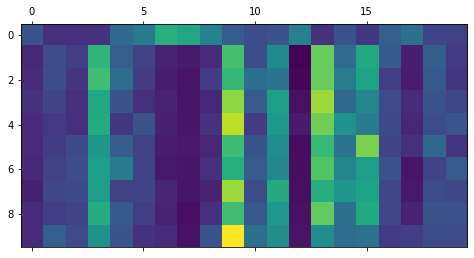

In [353]:
output_words, attentions = evaluate(
    encoder1, attn_decoder1, "so the sweet spot is between and .")
plt.matshow(attentions.numpy())

In [0]:
plt.show()

input = so the sweet spot is between and .
output = toi toi toi toi toi toi toi toi toi toi toi toi toi toi <EOS>


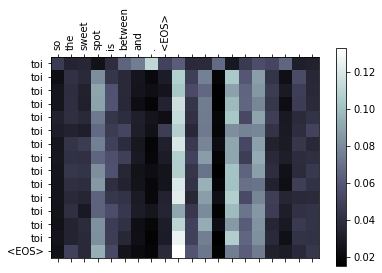

In [355]:
def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder1, attn_decoder1, input_sentence)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions)


evaluateAndShowAttention( "so the sweet spot is between and .")


In [0]:
# plt.show()

In [357]:
print(attentions.numpy())

[[0.04520178 0.03027663 0.03072606 0.03151767 0.05519724 0.06406497
  0.09046509 0.0867083  0.06732447 0.0491231  0.042453   0.04482097
  0.06692479 0.03181482 0.04447208 0.03368972 0.05087583 0.05872159
  0.03837779 0.03724406]
 [0.02749943 0.04155677 0.03652975 0.09313902 0.05002115 0.03735595
  0.02579931 0.02269348 0.02917498 0.09929609 0.04322501 0.07166545
  0.01400756 0.10711893 0.05616025 0.08737234 0.04837253 0.02434758
  0.04954956 0.03511481]
 [0.02870559 0.04243385 0.03291271 0.09821911 0.05696926 0.03483666
  0.02400109 0.02029398 0.03535055 0.09476084 0.05781328 0.06023954
  0.01629281 0.10712983 0.06524257 0.08381549 0.03669002 0.02340049
  0.04733367 0.03355869]
 [0.03196902 0.03883119 0.03048442 0.08669454 0.04479698 0.03070861
  0.02560329 0.02108438 0.02728894 0.11444042 0.04865906 0.08217566
  0.01961077 0.11735271 0.05569561 0.06952729 0.04146516 0.02870698
  0.0451126  0.03979233]
 [0.0290892  0.03393772 0.03043205 0.08859221 0.03357383 0.0439871
  0.02460104 0.02

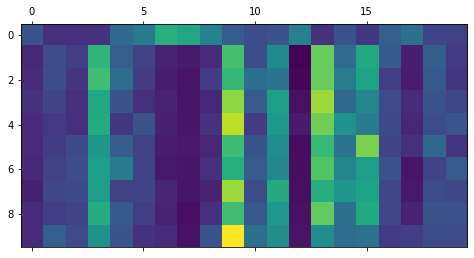

In [358]:
plt.matshow(attentions.numpy())

1. BiLSTM
2. GloVE embedding
3. presentation
4. BLUE Score and how error is calculated here
5. 
